In [1]:
import numpy as np
import matplotlib.pyplot as plt



## Exercice 2 : maximum de vraisemblance

### <span style="color:blue">QUESTION 2.1 :</span> 

Tirer 10 fois une pièce à pile ou face et modéliser les résultats obtenus comme ceux d'une variable aléatoire X qui vaut X_i=0 si on a pile et X_i=1 si on a face.

Calculez le maximum de vraisemblance du paramètre p d'un loi de Bernoulli qui modéliserait le problème. Pour y arriver, différentes valeures possibles de p seront testées et le p retenu sera celui qui a la plus grande vraisemblance.


- Vérifier empiriquement comment évolue ce maximum de vraisemblance si l'on effectue de plus en plus de tirages
- Que se passe-t-il quand il y a trop de tirages ? Représenter la log-vraisemblance plutot que la vraisemblance dans ce cas.




In [26]:
def tirage(NbTirages=100):
    NbPiles = np.random.randn(NbTirages) > 0
    NbPiles = np.sum(NbPiles)
    NbFaces=NbTirages-NbPiles
    return NbPiles, NbFaces

PossibleValuesForP=np.linspace(0.01,0.99,100)

def vraisemblance(n_pile, n_face, p):
    return (p**n_face)*((1-p)**n_pile)

def log_vraisemblance(n_pile, n_face, p):
    return (n_face* np.log10(p)) + ((n_pile)*np.log10(1-p))

def max_vraisemblance(n_pile, n_face, log =False):
    estimated_p = -1
    if log == False :
        max = vraisemblance(n_pile, n_face, PossibleValuesForP[0])
        for i in range(len(PossibleValuesForP) -1 ):
            p = PossibleValuesForP[i]
            if(vraisemblance(n_pile, n_face, p) >= max):
                max = vraisemblance(n_pile, n_face, p)
                estimated_p = p
    else :
        max = log_vraisemblance(n_pile, n_face, PossibleValuesForP[0])
        for i in range(len(PossibleValuesForP) -1 ):
            p = PossibleValuesForP[i]
            if(log_vraisemblance(n_pile, n_face, p) >= max):
                max = log_vraisemblance(n_pile, n_face, p)
                estimated_p = p

    return estimated_p

print("100 tirages : ", max_vraisemblance(*tirage(100)))
print("200 tirages : ", max_vraisemblance(*tirage(200)))
print("500 tirages : ", max_vraisemblance(*tirage(500)))
print("1000 tirages : ", max_vraisemblance(*tirage(1000)))
print("10000 tirages - normal vraisemblance: ", max_vraisemblance(*tirage(10000)))
print("10000 tirages - log vraisemblance: ", max_vraisemblance(*tirage(10000), log= True))
print("100000 tirages - log vraisemblance: ", max_vraisemblance(*tirage(100000), log= True))

100 tirages :  0.5247474747474747
200 tirages :  0.46535353535353535
500 tirages :  0.5148484848484849
1000 tirages :  0.45545454545454545
10000 tirages - normal vraisemblance:  0.98010101010101
10000 tirages - log vraisemblance:  0.495050505050505
100000 tirages - log vraisemblance:  0.5049494949494949



### <span style="color:blue">QUESTION 2.2 :</span> 


Vérifier empiriquement comment évolue ce maximum de vraisemblance si l'on effectue de plus en plus de tirages. Pour éviter de tirer des centaines de fois à pile ou face, vous pourrez juste modifier *NbTirages¨et *NbPiles* dans le code, puis voir le comportement de la courbe *plt.plot(PossibleValuesForP,CorrespondingLikelihood)*.


### <span style="color:blue">REPONSE 2.2 :</span> 



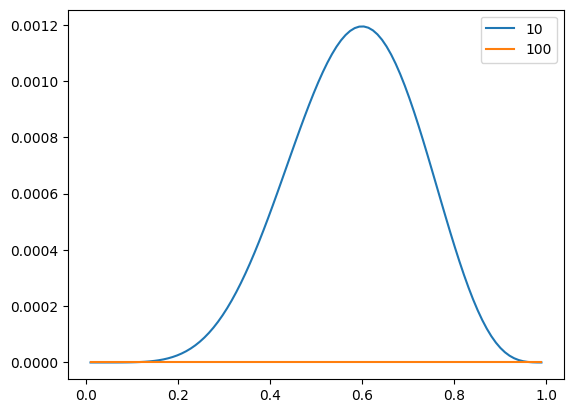

In [69]:
N = [10, 100]

for n in N :
    n_pile, n_face = tirage(n)
    CorrespondingLikelihood = list(vraisemblance(n_pile, n_face, p) for p in PossibleValuesForP)
    plt.plot(PossibleValuesForP, CorrespondingLikelihood)
plt.legend(N)



### <span style="color:blue">QUESTION 2.3 :</span> 


Que se passe-t-il quand il y a trop de tirages ? Représenter la log-vraisemblance plutot que la vraisemblance dans ce cas.

### <span style="color:blue">REPONSE 2.3 :</span> 


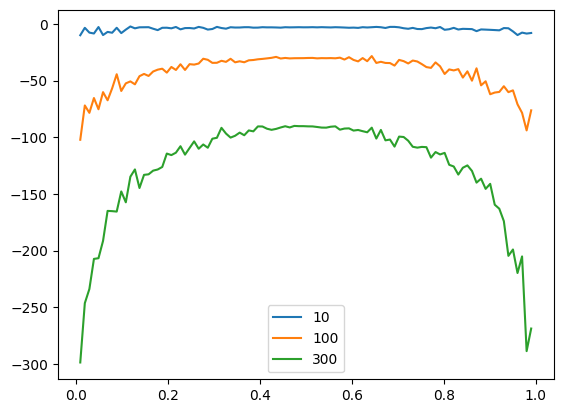

In [43]:
N = [10,100, 300]

for n in N :
    CorrespondingLikelihood = list(log_vraisemblance(*tirage(n),p) for p in PossibleValuesForP)
    plt.plot(PossibleValuesForP, CorrespondingLikelihood)
plt.legend(N)